## Simpson's Paradox

In groups A and B:  
mean A < mean B,  
but in subgroups    
  mean Ax > mean Bx and mean Ay > mean By

See [Wikipedia](https://en.wikipedia.org/wiki/Simpson%27s_paradox) for more examples.

todo: fix description

Suppose there is an A/B test of two versions of an app.  
Each version gets 1000 users.  
The versions are compared by mean value of a certain conversion and questions of uncertainty in conversion estimates (or confidence intervals and statistical significance) are put aside.    

Mean conversion rate in group B is higher than A.  
Does it mean that version B is better than A? No!  

Suppose there are two segments of users in each group (Al, Ar and Bl, Br) that differ in their overall activity and their conversion rate.  
For example, they came from different advertising campaigns.  
It is possible that conversion rate in group B is higher than A, but conversion rates in subgroups of B are worse than A:

$$
p_A < p_B
\\
p_{Al} > p_{Bl}
\\
p_{Ar} > p_{Br}.
$$  

<table>
<tr>
<td> <img src="simpsons_paradox_example1.png" alt="pa<pb, pal<pbl, par<pbr" style="width: 550px;"/> </td>
<td> <img src="simpsons_paradox_example2.png" alt="pa<pb, pal>pbl, par>pbr" style="width: 550px;"/> </td>
</tr>
</table>
</center>

An interpretation is following: the segment $r$ is more active than $l$ independent of the version A or B of the app.   
Due to uneven traffic distribution group B might get more users of the active segment $r$.  
In result, even though version B performs worse for each segment, overall mean in the group B is better than in the A.  

From practical standpoint, in A/B tests it is necessary to ensure even distribution and compare tested version for major user segments.  
An open question - is there any systematic way to do this regarding each possible segment?

### Animation

In [1]:
import pandas as pd
import numpy as np
np.random.seed(7)

import scipy.stats as stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [16]:
p_a = 0.45
n_a = 1000
p_b = 0.55
n_b = 1000

# key frames
# p_ar = 0.47, n_ar = 500, p_br = 0.57, n_br = 500
# p_ar = 0.60, n_ar = 500, p_br = 0.57, n_br = 500
# p_ar = 0.60, n_ar = 500, p_br = 0.57, n_br = 900
# p_ar = 0.60, n_ar = 200, p_br = 0.57, n_br = 900
# p_ar = 0.47, n_ar = 200, p_br = 0.57, n_br = 900
# p_ar = 0.47, n_ar = 200, p_br = 0.57, n_br = 500
# p_ar = 0.47, n_ar = 500, p_br = 0.57, n_br = 500

frames = []
frames = frames + [(p_ar, 500, 0.57, 500) for p_ar in np.arange(0.47, 0.60, 0.0101)]
frames = frames + [(0.60, 500, 0.57, 500)] * 3
frames = frames + [(0.60, 500, 0.57, n_br) for n_br in np.arange(500, 901, 20)]
frames = frames + [(0.60, 500, 0.57, 900)] * 3
frames = frames + [(0.60, n_ar, 0.57, 900) for n_ar in np.arange(500, 199, -20)]
frames = frames + [(0.60, 200, 0.57, 900)] * 30
frames = frames + [(p_ar, 200, 0.57, 900) for p_ar in np.arange(0.6, 0.47, -0.0101)]
frames = frames + [(0.47, 200, 0.57, 900)] * 3
frames = frames + [(0.47, 200, 0.57, n_br) for n_br in np.arange(900, 499, -19)]
frames = frames + [(0.47, 200, 0.57, 500)] * 3
frames = frames + [(0.47, n_ar, 0.57, 500) for n_ar in np.arange(200, 501, 20)]

frames = [(p_ar, n_ar, (p_a * n_a - p_ar * n_ar) / (n_a - n_ar), n_a - n_ar,
           p_br, n_br, (p_b * n_b - p_br * n_br) / (n_b - n_br), n_b - n_br) 
           for (p_ar, n_ar, p_br, n_br) in frames]

#display(frames[0:5])
#print('...')
#display(frames[-5:-1])

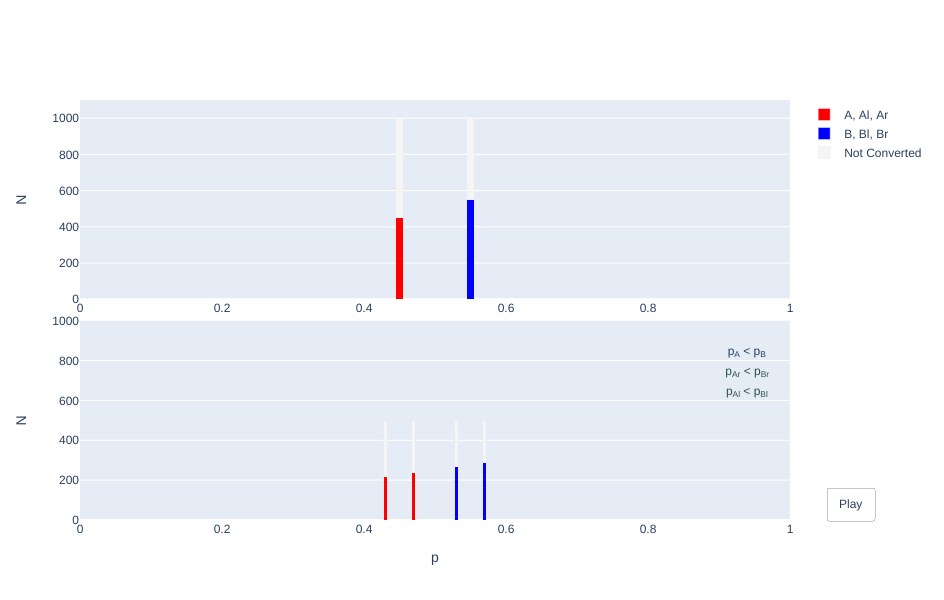

In [17]:
p_ar, n_ar, p_al, n_al, p_br, n_br, p_bl, n_bl = frames[0]

fig = make_subplots(
    rows=2, cols=1,
    vertical_spacing=0.051
)

fig.add_trace(go.Bar(x=[p_a], y=[p_a * n_a], width=0.01, name='A, Al, Ar', marker_color='red'), row=1, col=1)
fig.add_trace(go.Bar(x=[p_b], y=[p_b * n_b], width=0.01, name='B, Bl, Br', marker_color='blue'), row=1, col=1)
fig.add_trace(go.Bar(x=[p_a], y=[(1 - p_a) * n_a], width=0.01, name='Not Converted', marker_color='whitesmoke'), row=1, col=1)
fig.add_trace(go.Bar(x=[p_b], y=[(1 - p_b) * n_b], width=0.01, name='Not Converted', showlegend=False, marker_color='whitesmoke'), row=1, col=1)
fig.add_trace(go.Bar(x=[p_ar], y=[p_ar * n_ar], width=0.005, name='Ar', showlegend=False, marker_color='red'), row=2, col=1)
fig.add_trace(go.Bar(x=[p_ar], y=[(1 - p_ar) * n_ar], width=0.005, name='Not Converted', showlegend=False, marker_color='whitesmoke'), row=2, col=1)
fig.add_trace(go.Bar(x=[p_al], y=[p_al * n_al], width=0.005, name='Al', showlegend=False, marker_color='red'), row=2, col=1)
fig.add_trace(go.Bar(x=[p_al], y=[(1 - p_al) * n_al], width=0.005, name='Not Converted', showlegend=False, marker_color='whitesmoke'), row=2, col=1)
fig.add_trace(go.Bar(x=[p_br], y=[p_br * n_br], width=0.005, name='Br', showlegend=False, marker_color='blue'), row=2, col=1)
fig.add_trace(go.Bar(x=[p_br], y=[(1 - p_br) * n_br], width=0.005, name='Not Converted', showlegend=False, marker_color='whitesmoke'), row=2, col=1)
fig.add_trace(go.Bar(x=[p_bl], y=[p_bl * n_bl], width=0.005, name='Bl', showlegend=False, marker_color='blue'), row=2, col=1)
fig.add_trace(go.Bar(x=[p_bl], y=[(1 - p_bl) * n_bl], width=0.005, name='Not Converted', showlegend=False, marker_color='whitesmoke'), row=2, col=1)
fig.update_layout(barmode='stack')
fig.update_layout(legend_traceorder='normal')

antext = f"p<sub>A</sub> {'>' if p_a > p_b else '<'} p<sub>B</sub>"
antext_r = f"p<sub>Ar</sub> {'>' if p_ar > p_br else '<'} p<sub>Br</sub>"
anc_r = 'red' if p_ar > p_br else 'darkslategrey'
antext_l = f"p<sub>Al</sub> {'>' if p_al > p_bl else '<'} p<sub>Bl</sub>"
anc_l = 'red' if p_al > p_bl else 'darkslategrey'
fig.add_annotation(x=0.94, y=850,
                   xref='x2', yref='y2',
                   text=antext,
                   align='center',
                   showarrow=False)
fig.add_annotation(x=0.94, y=750,
                   xref='x2', yref='y2',
                   text=antext_r,
                   font_color=anc_r,
                   align='center',
                   showarrow=False)
fig.add_annotation(x=0.94, y=650,
                   xref='x2', yref='y2',
                   text=antext_l,
                   font_color=anc_l,
                   align='center',
                   showarrow=False)

fig_frames = []
for (p_ar, n_ar, p_al, n_al, p_br, n_br, p_bl, n_bl) in frames:
    antext = f"p<sub>A</sub> {'>' if p_a > p_b else '<'} p<sub>B</sub>"
    antext_r = f"p<sub>Ar</sub> {'>' if p_ar > p_br else '<'} p<sub>Br</sub>"
    anc_r = 'red' if p_ar > p_br else 'darkslategrey'
    antext_l = f"p<sub>Al</sub> {'>' if p_al > p_bl else '<'} p<sub>Bl</sub>"
    anc_l = 'red' if p_al > p_bl else 'darkslategrey'

    layout_i = go.Layout(annotations=[
        go.layout.Annotation(x=0.94, y=850,
                             xref='x2', yref='y2',
                             text=antext,
                             align='center',
                             showarrow=False),
        go.layout.Annotation(x=0.94, y=750,
                             xref='x2', yref='y2',
                             text=antext_r,
                             font_color=anc_r,
                             align='center',
                             showarrow=False),
        go.layout.Annotation(x=0.94, y=650,
                             xref='x2', yref='y2',
                             text=antext_l,
                             font_color=anc_l,
                             align='center',
                             showarrow=False)
    ])

    fig_frames.append(go.Frame(data=[go.Bar(visible=True),
                                     go.Bar(visible=True),
                                     go.Bar(visible=True),
                                     go.Bar(visible=True),
                                     go.Bar(x=[p_ar], y=[p_ar * n_ar]),
                                     go.Bar(x=[p_ar], y=[(1 - p_ar) * n_ar]),
                                     go.Bar(x=[p_al], y=[p_al * n_al]),
                                     go.Bar(x=[p_al], y=[(1 - p_al) * n_al]),
                                     go.Bar(x=[p_br], y=[p_br * n_br]),
                                     go.Bar(x=[p_br], y=[(1 - p_br) * n_br]),
                                     go.Bar(x=[p_bl], y=[p_bl * n_bl]),
                                     go.Bar(x=[p_bl], y=[(1 - p_bl) * n_bl])],
                               traces=[0,1,2,3,4,5,6,7,8,9,10,11],
                               layout=layout_i))

fig.frames=fig_frames
button = dict(
             label='Play',
             method='animate',
             args=[None, dict(frame=dict(duration=50, redraw=False), 
                              transition=dict(duration=0),
                              fromcurrent=True,
                              mode='immediate')])
fig.update_layout(updatemenus=[dict(type='buttons',
                              showactive=False,
                              y=0,
                              x=1.05,
                              xanchor='left',
                              yanchor='bottom',
                              buttons=[button])])

fig.update_layout(xaxis_range=[0,1],
                  xaxis2_range=[0,1],
                  yaxis_range=[0,1100],
                  yaxis2_range=[0,1000],
                  xaxis2_title='p',
                  yaxis_title='N',
                  yaxis2_title='N',
                  height=600)